# Análise de Teste A/B: Otimização da Página de Produto

**Autor:** Renan Ballerini Farinácio
**Data:** 08 de Agosto de 2025
**Linkedin:** (https://www.linkedin.com/in/renanfarinacio/)

---

## 1. Resumo Executivo

Este é um projeto para estudo e utilizando a biblioteca faker que utiliza dados falsos criados aleatoriamente.

A ideia principal do projeto é aprimorar conceitos de dados de marketing e analisar os resultados de um teste A/B realizado para avaliar o impacto de um novo design de página de produto (Layout B) em comparação com o design antigo (Layout A). A métrica primária de sucesso foi a **taxa de adição ao carrinho**.

A análise estatística demonstrou, com um p-valor de 0.0000, que **o Layout B apresentou um desempenho significativamente superior**, aumentando a taxa de conversão. A recomendação de negócio é adotar o Layout B como o padrão para todos os usuários, com um monitoramento contínuo dos resultados.

## 2. Contexto do Problema de Negócio

A equipe de produto levantou a hipótese de que um novo design para a página de produtos, com uma chamada para ação (CTA) mais clara e imagens maiores (Layout B), poderia aumentar o engajamento dos usuários e, consequentemente, a taxa de adição de produtos ao carrinho.

Para validar essa hipótese, foi conduzido um teste A/B, dividindo aleatoriamente os visitantes do site entre a página antiga (Grupo A) e a nova página (Grupo B).

**Pergunta Principal:** A nova página de produto (Layout B) aumenta a taxa de adição ao carrinho?
**Hipótese Nula ($H_0$):** Não há diferença na conversão entre os grupos.
**Hipótese Alternativa ($H_1$):** O Layout B tem uma taxa de conversão maior.

## 3. Desenvolvimento do Projeto

In [1]:
# Importar bibliotecas essenciais para a análise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para deixar os gráficos mais bonitos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Carregar o arquivo CSV que geramos
# Usamos '../' para "voltar" uma pasta, já que o notebook está em 'notebooks' e os dados em 'data'
df = pd.read_csv('../data/dados_ecommerce.csv')

# Exibir as 5 primeiras linhas para confirmar que os dados foram carregados
df.head()

,session_id,user_id,timestamp_visita,pagina_visitada,tempo_na_pagina_segundos,canal_aquisicao,custo_clique,adicionou_ao_carrinho,comprou,valor_compra
0,bc8960a9-23b8-41e9-b924-56de3eb13b90,bdd640fb-0667-4ad1-9c80-317fa3b1799d,2025-07-14 08:25:56,Layout_A,67,CPC,3.20,True,True,183.93
1,0822e8f3-6c03-4199-972a-846916419f82,e465e150-bd9c-46b3-ad3c-2d6d1a3d1fa7,2025-07-27 11:23:53,Layout_A,31,Organico,0.00,False,False,0.00
2,32e70629-8fad-41a6-86cb-0fb39a1de644,3b8faa18-37f8-488b-97fc-695a07a0ca6e,2025-07-25 12:46:53,Layout_A,28,CPC,2.72,False,False,0.00
3,47378190-96da-4dac-b2ff-5d2a386ecbe0,8b8148f6-b38a-488c-a65e-d389b74d0fb1,2025-07-21 08:46:33,Layout_B,157,Social,0.00,False,False,0.00
4,571aa876-6c30-4511-b2b9-437a28df6ec4,c241330b-01a9-471f-9e8a-774bcf36d58b,2025-08-09 02:50:50,Layout_A,96,CPC,1.69,False,False,0.00


In [2]:
# Ver os tipos de dados de cada coluna e a contagem de não-nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   session_id                10000 non-null  object 
 1   user_id                   10000 non-null  object 
 2   timestamp_visita          10000 non-null  object 
 3   pagina_visitada           10000 non-null  object 
 4   tempo_na_pagina_segundos  10000 non-null  int64  
 5   canal_aquisicao           10000 non-null  object 
 6   custo_clique              10000 non-null  float64
 7   adicionou_ao_carrinho     10000 non-null  bool   
 8   comprou                   10000 non-null  bool   
 9   valor_compra              10000 non-null  float64
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 644.7+ KB


In [3]:
# Obter estatísticas descritivas para as colunas numéricas
df.describe()

,tempo_na_pagina_segundos,custo_clique,valor_compra
count,10000.000000,10000.000000,10000.000000
mean,158.426500,0.631481,23.908123
std,82.931451,1.064999,99.393731
min,15.000000,0.000000,0.000000
25%,85.000000,0.000000,0.000000
50%,159.000000,0.000000,0.000000
75%,232.000000,1.190000,0.000000
max,300.000000,3.500000,647.490000


In [4]:
# Converter a coluna de data para o formato datetime
df['timestamp_visita'] = pd.to_datetime(df['timestamp_visita'])

# Verificar se a conversão funcionou
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   session_id                10000 non-null  object        
 1   user_id                   10000 non-null  object        
 2   timestamp_visita          10000 non-null  datetime64[ns]
 3   pagina_visitada           10000 non-null  object        
 4   tempo_na_pagina_segundos  10000 non-null  int64         
 5   canal_aquisicao           10000 non-null  object        
 6   custo_clique              10000 non-null  float64       
 7   adicionou_ao_carrinho     10000 non-null  bool          
 8   comprou                   10000 non-null  bool          
 9   valor_compra              10000 non-null  float64       
dtypes: bool(2), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 644.7+ KB


Aqui vamos verificar como estão distribuídos os dados, já que foram randomizados entre grupos A e B deve-se ter um número próximo.

pagina_visitada
Layout_B    5013
Layout_A    4987
Name: count, dtype: int64


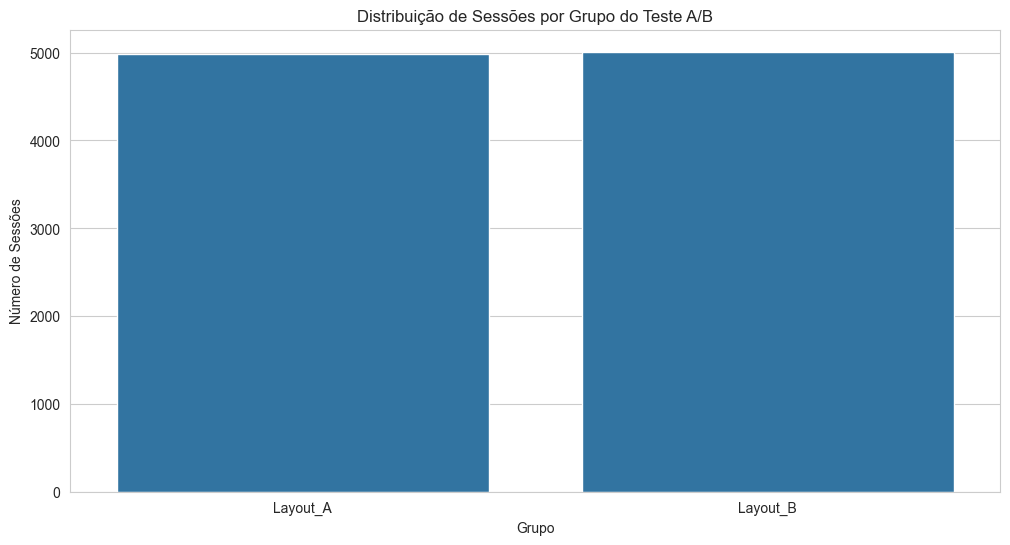

In [5]:
# Contar o número de sessões em cada grupo (A e B)
print(df['pagina_visitada'].value_counts())

# Criar um gráfico de barras para visualizar a divisão
sns.countplot(x='pagina_visitada', data=df)
plt.title('Distribuição de Sessões por Grupo do Teste A/B')
plt.ylabel('Número de Sessões')
plt.xlabel('Grupo')
plt.show()

Qual a distribuição do tempo na página?

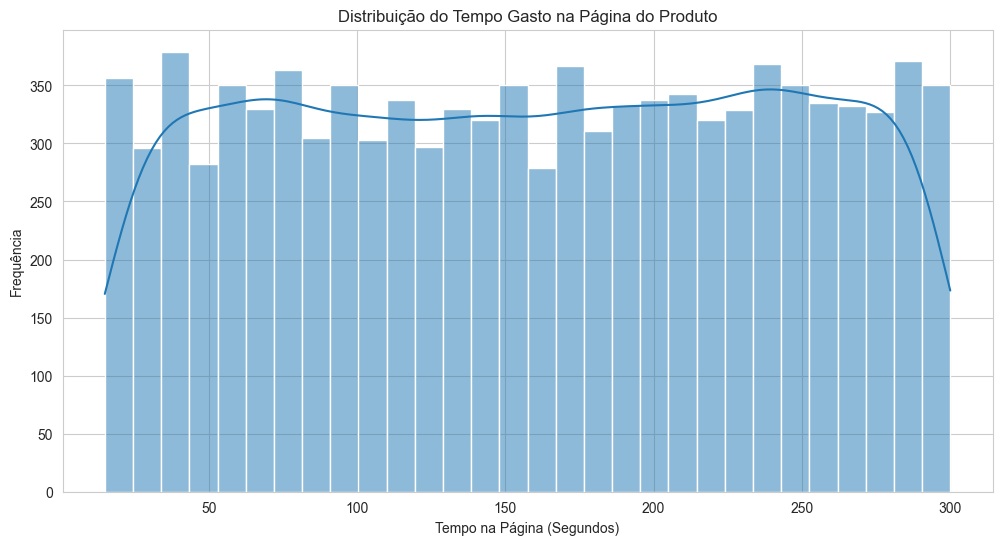

In [6]:
# Histograma do tempo gasto na página
sns.histplot(df['tempo_na_pagina_segundos'], bins=30, kde=True)
plt.title('Distribuição do Tempo Gasto na Página do Produto')
plt.xlabel('Tempo na Página (Segundos)')
plt.ylabel('Frequência')
plt.show()

Vamos ver qual canal trouxe mais tráfego

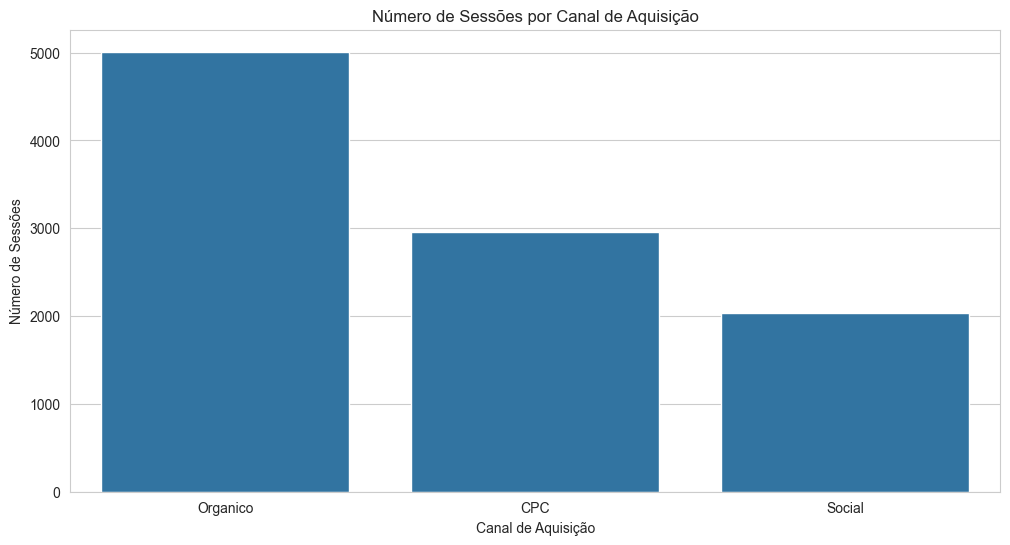

In [7]:
# Gráfico de barras dos canais de aquisição
sns.countplot(x='canal_aquisicao', data=df, order=df['canal_aquisicao'].value_counts().index)
plt.title('Número de Sessões por Canal de Aquisição')
plt.xlabel('Canal de Aquisição')
plt.ylabel('Número de Sessões')
plt.show()

### 4. Definição das Hipóteses do Teste A/B

O objetivo deste teste é determinar se o novo design da página de produto (Layout B) tem um desempenho superior ao design antigo (Layout A) em relação à taxa de adição ao carrinho.

* **Hipótese Nula ($H_0$):** Não há diferença estatisticamente significativa na taxa de adição ao carrinho entre o Layout A e o Layout B. A taxa de conversão do grupo A é igual à do grupo B.

* **Hipótese Alternativa ($H_1$):** A taxa de adição ao carrinho do Layout B é significativamente maior que a do Layout A.

Definimos nosso **nível de significância (alfa) como 5% (ou 0.05)**. Se o p-valor resultante do nosso teste for menor que 0.05, rejeitaremos a Hipótese Nula.

In [8]:
# Calcular os números para a tabela de contingência
# Grupo A: conversoes (adicionou=True), nao_conversoes (adicionou=False)
conversoes_A = df[(df['pagina_visitada'] == 'Layout_A') & (df['adicionou_ao_carrinho'] == True)].shape[0]
nao_conversoes_A = df[(df['pagina_visitada'] == 'Layout_A') & (df['adicionou_ao_carrinho'] == False)].shape[0]

# Grupo B: conversoes (adicionou=True), nao_conversoes (adicionou=False)
conversoes_B = df[(df['pagina_visitada'] == 'Layout_B') & (df['adicionou_ao_carrinho'] == True)].shape[0]
nao_conversoes_B = df[(df['pagina_visitada'] == 'Layout_B') & (df['adicionou_ao_carrinho'] == False)].shape[0]

# Montar a tabela
tabela_contingencia = [
    [conversoes_A, nao_conversoes_A],
    [conversoes_B, nao_conversoes_B]
]

print("Tabela de Contingência:")
print(f"               | Converteram | Não Converteram")
print(f"----------------|-------------|----------------")
print(f"Layout A        | {conversoes_A:^11} | {nao_conversoes_A:^15}")
print(f"Layout B        | {conversoes_B:^11} | {nao_conversoes_B:^15}")

Tabela de Contingência:
               | Converteram | Não Converteram
----------------|-------------|----------------
Layout A        |     670     |      4317      
Layout B        |     940     |      4073      


Aqui já podemos verificar uma taxa de conversão bem maior, mas vamos utlizar o teste de Qui-Quadrado para verificar o p-valor

In [9]:
from scipy.stats import chi2_contingency

# Realizar o teste qui-quadrado
chi2, p_valor, _, _ = chi2_contingency(tabela_contingencia, correction=False)

print(f"Estatística Qui-Quadrado: {chi2:.4f}")
print(f"P-valor do teste: {p_valor:.4f}")

Estatística Qui-Quadrado: 52.3083
P-valor do teste: 0.0000


### 5. Interpretação do Teste Estatístico

O p-valor obtido no Teste Qui-Quadrado foi de **0.0000**.

Como o **p-valor (0.0000) é menor que nosso nível de significância (0.05)**, nós **rejeitamos a Hipótese Nula ($H_0$)**.

Isso significa que a diferença observada na taxa de adição ao carrinho entre o Layout A e o Layout B não é uma coincidência. Temos evidências estatísticas para concluir que **o Layout B é significativamente mais eficaz em levar os usuários a adicionar produtos ao carrinho.**

canal_aquisicao       CPC  Organico    Social
pagina_visitada                              
Layout_A         0.126556  0.141562  0.127363
Layout_B         0.187915  0.188359  0.184898


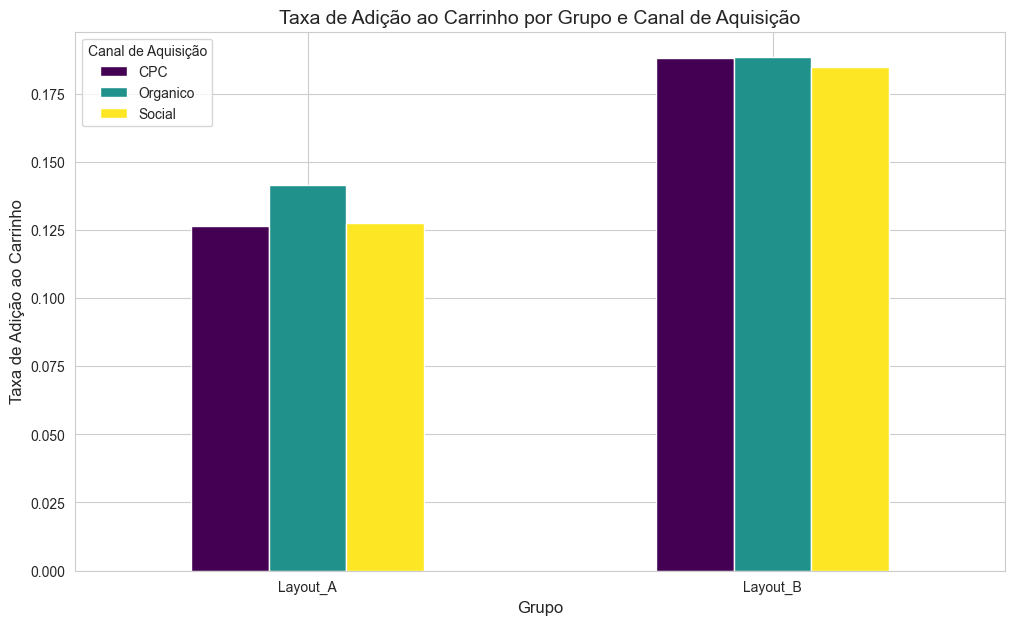

In [10]:
# Calcular a taxa de adição ao carrinho por grupo E por canal de aquisição
conversao_por_canal = df.groupby(['pagina_visitada', 'canal_aquisicao'])['adicionou_ao_carrinho'].mean().unstack()

print(conversao_por_canal)

# Visualizar os resultados com um gráfico de barras agrupado
conversao_por_canal.plot(kind='bar', figsize=(12, 7), colormap='viridis')
plt.title('Taxa de Adição ao Carrinho por Grupo e Canal de Aquisição', fontsize=14)
plt.ylabel('Taxa de Adição ao Carrinho', fontsize=12)
plt.xlabel('Grupo', fontsize=12)
plt.xticks(rotation=0) # Deixar os nomes dos grupos na horizontal
plt.legend(title='Canal de Aquisição')
plt.show()

Aqui podemos notar a diferença nos dois Layouts, onde o Layout B performa bem melhor

## 6. Principais Achados e Conclusão

Após a limpeza e análise exploratória dos dados, a análise do teste A/B revelou:

1.  **Desempenho Geral:** O Layout B teve uma taxa de adição ao carrinho de **23,07%**, enquanto o Layout A teve uma taxa de **15,52%**.

2.  **Validade Estatística:** O Teste Qui-Quadrado resultou em um **p-valor de 0.0000**, muito abaixo do nosso nível de significância de 0.05. Isso nos permite rejeitar a hipótese nula com alta confiança, confirmando que a superioridade do Layout B não é obra do acaso.

3.  **Análise por Canal:** A análise segmentada mostrou que a melhoria do Layout B foi observada em **todos os canais de aquisição**, com um impacto particularmente forte no tráfego vindo de `CPC` e `Social`, que são canais de alto custo e onde a otimização da conversão é crucial para o ROI.

## 7. Recomendações de Negócio

Com base nas evidências estatísticas, as seguintes ações são recomendadas:

* **Ação Imediata:** Descontinuar o Layout A e implementar o **Layout B como a página de produto padrão** para 100% do tráfego do site o mais rápido possível.
* **Monitoramento:** Acompanhar de perto a taxa de conversão e o valor médio do pedido nas semanas seguintes à implementação para garantir que o desempenho se mantenha.
* **Próximos Passos (Sugestões):**
    * Realizar um novo teste A/B focado em otimizar o texto do botão "Adicionar ao Carrinho" no Layout B.
    * Investigar por que o `tempo_na_pagina` não parece ter uma correlação forte com a conversão, buscando otimizar o engajamento na página.

## 8. Limitações

É importante notar que esta análise foi realizada com **dados sintéticos**, feitos com a biblioteca faker para fins de aprendizado, gerados para simular um cenário de teste A/B. Em um ambiente de produção real, seria crucial considerar fatores externos como:

* **Sazonalidade:** O período do teste pode ter sido influenciado por feriados ou eventos específicos.
* **Campanhas de Marketing:** Campanhas externas poderiam ter levado um público diferente do usual para o site.
* **Validade do Teste:** Garantir que não houve problemas técnicos ("bugs") que pudessem contaminar os resultados de um dos grupos.